<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context attributes
**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

Data citation: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Table of Content

1. **[Data Preprocessing](#dp)**
1. **[K Nearest Neighbors (KNN)](#knn)**
2. **[Naive Bayes](#nb)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

C:\Users\sai\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\sai\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\sai\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\sai\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


#### Load the csv file

In [2]:
df=pd.read_csv('bank.csv')
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1,no
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6,yes
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1,yes


In [4]:
df.shape

(9640, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 11 columns):
age               9640 non-null int64
duration          9640 non-null int64
campaign          9640 non-null int64
pdays             9640 non-null int64
previous          9640 non-null int64
emp.var.rate      9640 non-null float64
cons.price.idx    9640 non-null float64
cons.conf.idx     9640 non-null float64
euribor3m         9640 non-null float64
nr.employed       9640 non-null float64
y                 9640 non-null object
dtypes: float64(5), int64(5), object(1)
memory usage: 828.6+ KB


In [6]:
df.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df['y'].value_counts()

no     5000
yes    4640
Name: y, dtype: int64

<a id="dp"> </a>
## 1. Data Preprocessing

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Remove the outliers (if any).</b>
                </font>
            </div>
        </td>
    </tr>
</table>

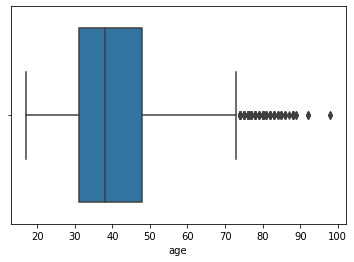

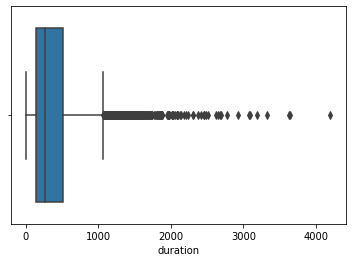

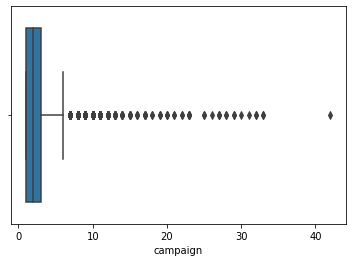

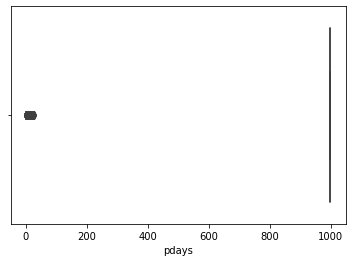

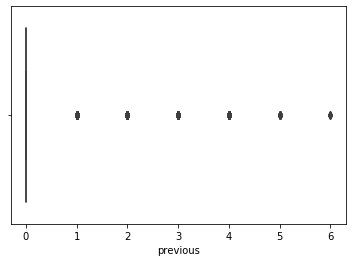

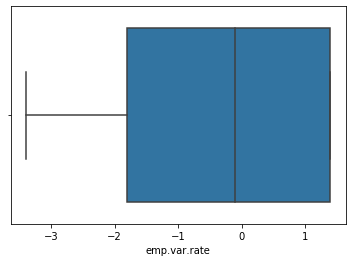

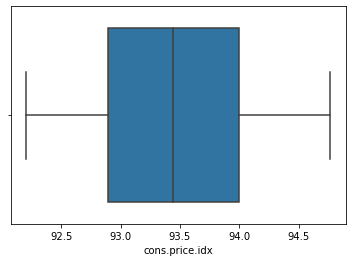

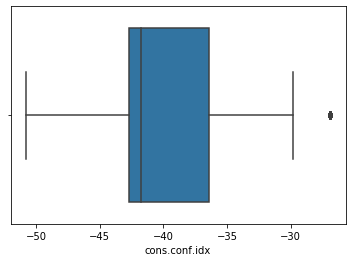

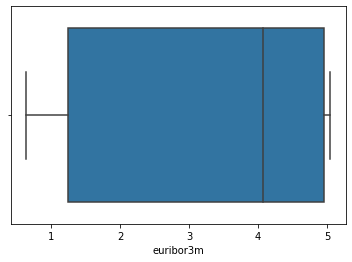

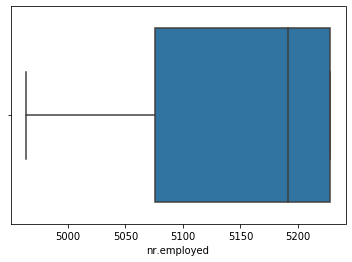

In [3]:
num_cols=df.select_dtypes(np.number)
for i in num_cols.columns:
    sns.boxplot(df[i])
    plt.show()

In [9]:
#yes there are many outliers present so removing them using iqr method

In [8]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
df=df[~((df<ll)|(df>ul))]
df=df.dropna()
df.shape

(6555, 11)

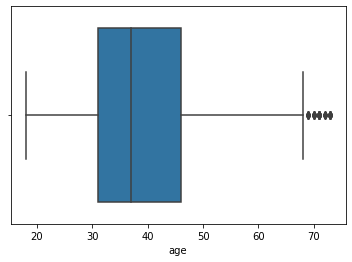

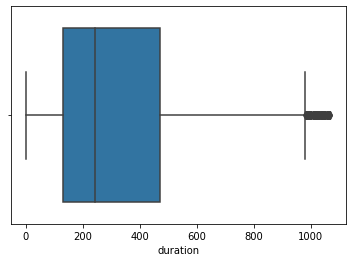

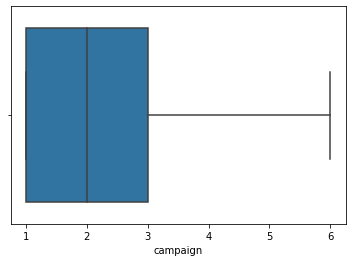

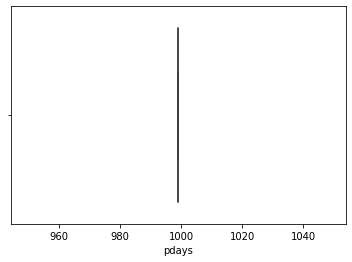

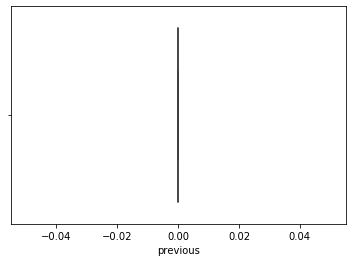

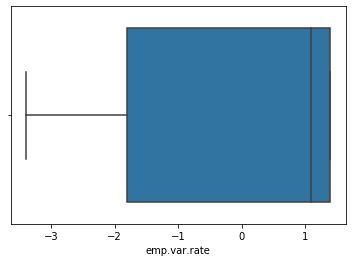

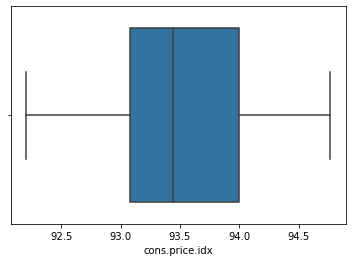

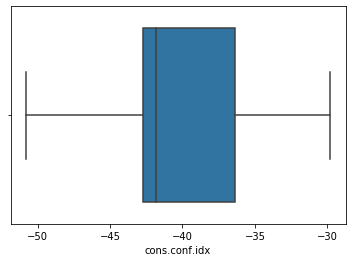

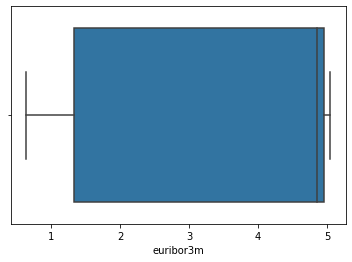

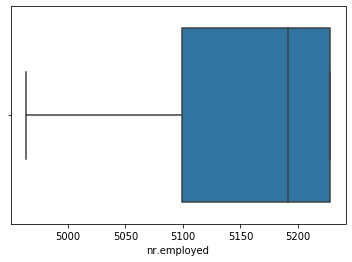

In [10]:
num_cols=df.select_dtypes(np.number)
for i in num_cols.columns:
    sns.boxplot(df[i])
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Separate the dependent and the independent variables. Also, in the target variable, replace no with 0 and yes with 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
df['y']=df['y'].map({'yes':1,'no':0})
y=df['y']
x=df.drop('y',axis=1)
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32.0,205.0,2.0,999.0,0.0,1.1,93.994,-36.4,4.858,5191.0,0
5,25.0,243.0,3.0,999.0,0.0,-1.8,92.843,-50.0,1.531,5099.1,1
6,36.0,214.0,1.0,999.0,0.0,-0.1,93.200,-42.0,4.120,5195.8,0
7,43.0,550.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
8,52.0,64.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.855,5191.0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Replace the value "unknown" from each column with NaN.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
df=df.replace('unknown',np.nan)

In [15]:
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32.0,205.0,2.0,999.0,0.0,1.1,93.994,-36.4,4.858,5191.0,0
5,25.0,243.0,3.0,999.0,0.0,-1.8,92.843,-50.0,1.531,5099.1,1
6,36.0,214.0,1.0,999.0,0.0,-0.1,93.200,-42.0,4.120,5195.8,0
7,43.0,550.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
8,52.0,64.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.855,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...
9634,30.0,475.0,5.0,999.0,0.0,-3.4,92.379,-29.8,0.781,5017.5,1
9635,37.0,854.0,3.0,999.0,0.0,1.4,94.465,-41.8,4.961,5228.1,0
9636,40.0,353.0,2.0,999.0,0.0,1.4,93.918,-42.7,4.960,5228.1,0
9638,39.0,233.0,1.0,999.0,0.0,1.4,94.465,-41.8,4.864,5228.1,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Look for the null values and treat the null values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
df.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# there are no null values present in the data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Remove the unnecessary variables that will not contribute to the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
df.var().sort_values(ascending=False)

duration          64214.958630
nr.employed        5540.087617
age                 103.732072
cons.conf.idx        21.712605
euribor3m             3.167212
emp.var.rate          2.646893
campaign              1.647471
cons.price.idx        0.342380
y                     0.235967
previous              0.000000
pdays                 0.000000
dtype: float64

In [17]:
# variables with low variance are useless features so we can drop pdays and previous variables

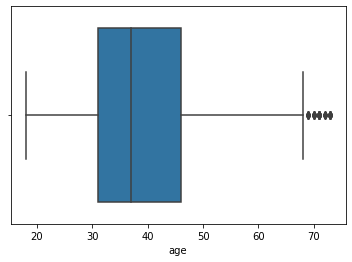

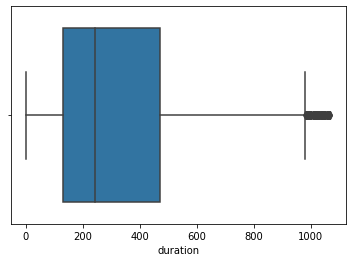

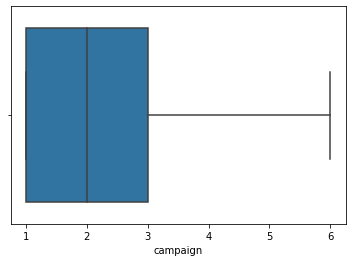

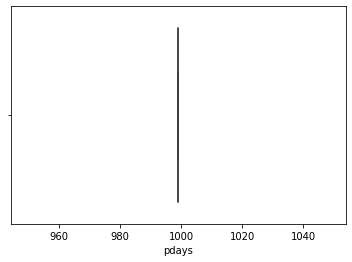

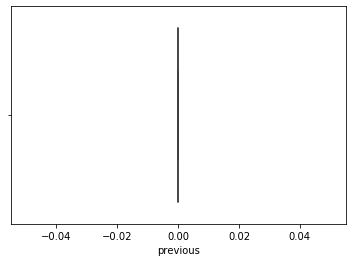

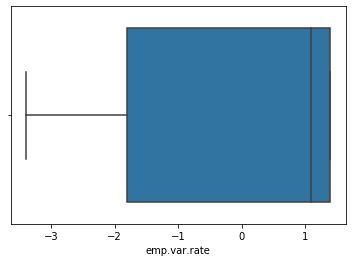

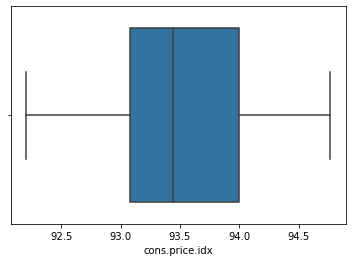

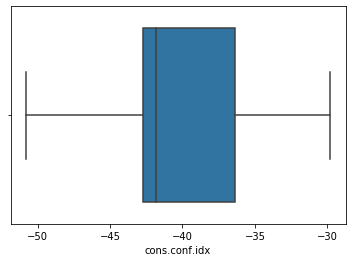

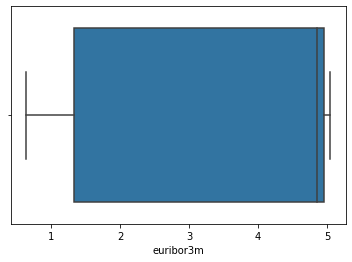

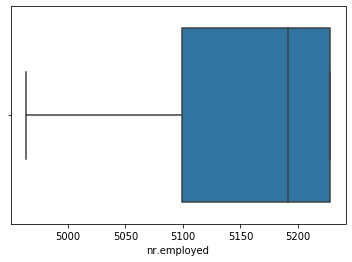

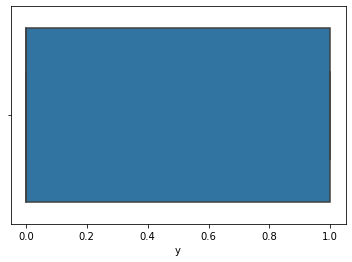

In [18]:
num_cols = df.select_dtypes(np.number)

for i in num_cols.columns:
    sns.boxplot(df[i])
    plt.show()

In [19]:
df=df.drop(['pdays','previous'],axis=1)
df.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32.0,205.0,2.0,1.1,93.994,-36.4,4.858,5191.0,0
5,25.0,243.0,3.0,-1.8,92.843,-50.0,1.531,5099.1,1
6,36.0,214.0,1.0,-0.1,93.200,-42.0,4.120,5195.8,0
7,43.0,550.0,1.0,1.1,93.994,-36.4,4.857,5191.0,0
8,52.0,64.0,1.0,1.1,93.994,-36.4,4.855,5191.0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the distribution of all the numeric variables and find the value of skewness for each variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

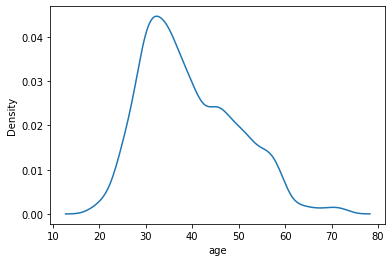

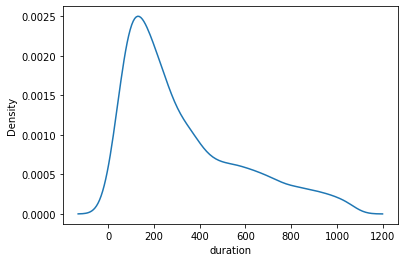

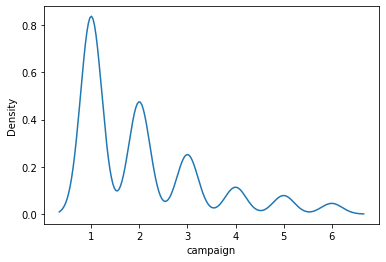

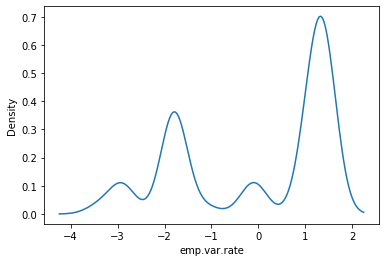

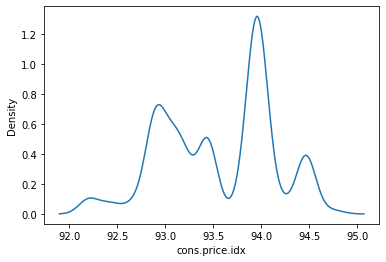

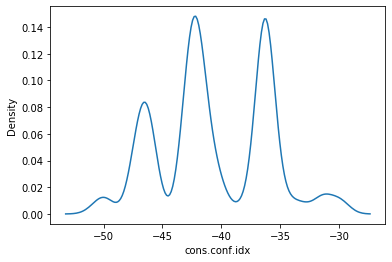

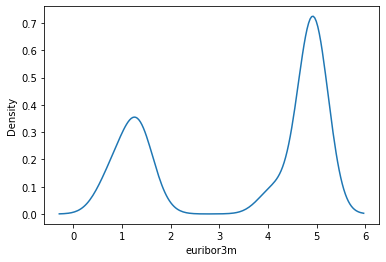

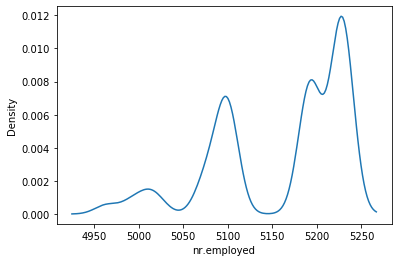

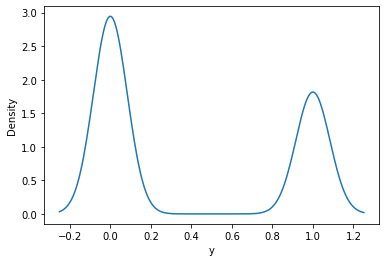

In [20]:
num_cols=df.select_dtypes(np.number)
for i in num_cols.columns:
    sns.kdeplot(df[i])
    plt.show()

In [22]:
print("the skewness for each variable is : ")
print(df.skew())

the skewness for each variable is : 
age               0.598601
duration          1.041608
campaign          1.324147
emp.var.rate     -0.575913
cons.price.idx   -0.214375
cons.conf.idx     0.104692
euribor3m        -0.545969
nr.employed      -0.880652
y                 0.488500
dtype: float64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

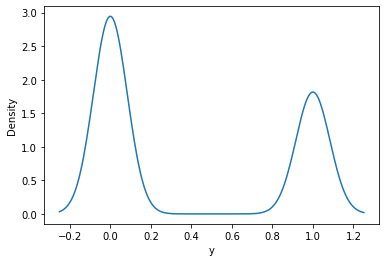

In [21]:
sns.kdeplot(df['y'])
plt.show()

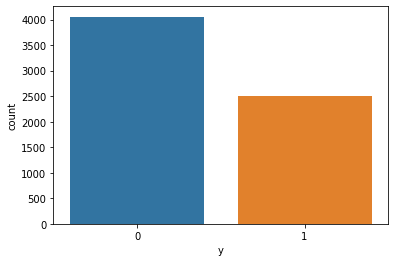

In [23]:
sns.countplot(df['y'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
y=df['y']
x=df.drop('y',axis=1)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xs=ss.fit_transform(x)
xs=pd.DataFrame(xs,columns=x.columns)
xs.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.722787,-0.480765,-0.024486,0.701361,0.749298,0.910658,0.765585,0.394074
1,-1.410132,-0.330797,0.754670,-1.081276,-1.217928,-2.008221,-1.104009,-0.840708
2,-0.330018,-0.445246,-0.803642,-0.036282,-0.607764,-0.291233,0.350869,0.458567
3,0.357326,0.880787,-0.803642,0.701361,0.749298,0.910658,0.765023,0.394074
4,1.241055,-1.037225,-0.803642,0.701361,0.749298,0.910658,0.763899,0.394074


<a id="knn"> </a>
## 2. K Nearest Neighbors (KNN)

## We shall use the bank marketing dataset that we cleaned above

Before applying classification techniques to predict whether the client subscribed the term deposit or not, let us split the dataset in train and test set.

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)
ss1=StandardScaler()

x_trains=ss1.fit_transform(x_train)
x_tests = ss1.transform(x_test)
x_trains = pd.DataFrame(x_trains,columns=x.columns)
x_tests = pd.DataFrame(x_tests,columns=x.columns)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_trains,y_train)

y_train_pred=knn.predict(x_trains)
y_test_pred=knn.predict(x_tests)

y_train_prob=knn.predict_proba(x_trains)[:,1]
y_test_prob=knn.predict_proba(x_tests)[:,1]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a function to draw a confusion matrix (heatmap) and a function to plot a roc-auc curve.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Define a function to plot the confusion matrix.

In [27]:
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,classification_report,accuracy_score
confusion_matrix(y_test,y_test_pred)

array([[1068,  158],
       [  97,  644]], dtype=int64)

[[1068  158]
 [  97  644]]


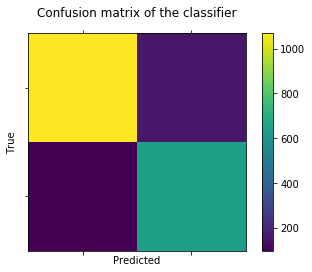

In [29]:
cm = confusion_matrix(y_test,y_test_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Define a function to plot the ROC curve.

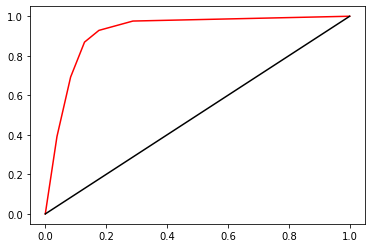

In [35]:
fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr,'r')
plt.plot(fpr,fpr,'k')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a knn model on a training dataset with euclidean distance and 3 neighbours to predict whether or not the client subscribed the term deposit. Calculate the accuracy of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(p=2,n_neighbors=3)
knn.fit(x_trains,y_train)

y_test_pred=knn.predict(x_tests)
y_test_prob=knn.predict_proba(x_tests)[:,1]

print("accuracy of the model is : ",accuracy_score(y_test,y_test_pred))

accuracy of the model is :  0.8581596339603457


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Plot a confusion matrix using the function created above and print a classification report. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
print("confusion matrix: \n ",confusion_matrix(y_test,y_test_pred))
print("\n")
print("classification report \n ",classification_report(y_test,y_test_pred))

confusion matrix: 
  [[1073  153]
 [ 126  615]]


classification report 
                precision    recall  f1-score   support

           0       0.89      0.88      0.88      1226
           1       0.80      0.83      0.82       741

    accuracy                           0.86      1967
   macro avg       0.85      0.85      0.85      1967
weighted avg       0.86      0.86      0.86      1967



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the optimal value of 'k' in knn with 3 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)
    metric = ['hamming','euclidean','manhattan','Chebyshev']

In [38]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,25,2),
       'metric':['hamming','euclidean','manhattan','Chebyshev']}

gsearch=GridSearchCV(estimator=knn,param_grid=params,cv=3,scoring='roc_auc',n_jobs=-1)
gsearch.fit(xs,y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['hamming', 'euclidean', 'manhattan',
                                    'Chebyshev'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])},
             scoring='roc_auc')

In [39]:
gsearch.best_params_

{'metric': 'manhattan', 'n_neighbors': 23}

In [40]:
# the optimum value of k(n_neighbors) =23

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13.  Build a KNN model with the best parameters and find the accuracy. Also generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=23,metric='manhattan')
knn.fit(x_trains,y_train)

y_test_pred=knn.predict(x_tests)
y_test_prob=knn.predict_proba(x_tests)[:,1]

print("the accuracy of the model is : ",accuracy_score(y_test,y_test_pred))
print("\n")
print("classification report : \n ",classification_report(y_test,y_test_pred))

the accuracy of the model is :  0.8723945094051856


classification report : 
                precision    recall  f1-score   support

           0       0.91      0.88      0.90      1226
           1       0.81      0.87      0.84       741

    accuracy                           0.87      1967
   macro avg       0.86      0.87      0.87      1967
weighted avg       0.88      0.87      0.87      1967



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the area under the receiver operating characteristic curve and the confusion matrix for the tuned KNN model built in question 13.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=23,metric='manhattan')
knn.fit(x_trains,y_train)

y_test_pred=knn.predict(x_tests)
y_test_prob=knn.predict_proba(x_tests)[:,1]

print("confusion matrix : ",confusion_matrix(y_test,y_test_pred))
print("The area under the curve is : ",roc_auc_score(y_test,y_test_prob))

confusion matrix :  [[1075  151]
 [ 100  641]]
The area under the curve is :  0.9383735880043943


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the percentage of misclassified and correctly classified observations.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
cm=confusion_matrix(y_test,y_test_pred)
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]

overall_accuracy=(TP+TN)/(TP+TN+FP+FN)
misclassified_rate=(FN+FP)/(TP+TN+FP+FN)

print("% of correctly classified observations : ",overall_accuracy*100)
print("% of misclassified observations : ",misclassified_rate*100)

% of correctly classified observations :  87.23945094051857
% of misclassified observations :  12.760549059481443


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compute the accuracy for each value of k and append the value in a list 'accuracy'. Build knn models for euclidean distance metric. Consider only the odd numbers between the range 1 and 25 for the 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
from sklearn.neighbors import KNeighborsClassifier
accuracy=[]
for i in range(1,25,2):
    knn=KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(x_trains,y_train)
    
    y_test_pred=knn.predict(x_tests)
    y_test_prob=knn.predict_proba(x_tests)[:,1]
    
    acc=accuracy_score(y_test,y_test_pred)
    accuracy.append(acc)
    
print("The accuracy for each value of k is : \n ",accuracy)

The accuracy for each value of k is : 
  [0.8276563294356889, 0.8581596339603457, 0.8703609557702084, 0.8703609557702084, 0.8723945094051856, 0.8723945094051856, 0.8769700050838841, 0.8774783934926284, 0.8734112862226742, 0.8718861209964412, 0.8703609557702084, 0.8718861209964412]


In [47]:
a=pd.DataFrame(range(1,25,2),columns=['k'])
a['accuracy']=accuracy
a

,k,accuracy
0,1,0.827656
1,3,0.858160
2,5,0.870361
3,7,0.870361
4,9,0.872395
5,11,0.872395
6,13,0.876970
7,15,0.877478
8,17,0.873411
9,19,0.871886


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Draw a line plot to see the accuracy (list created in the above question) for each value of K using euclidean distance as a metric of KNN model and find the optimal value of 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)

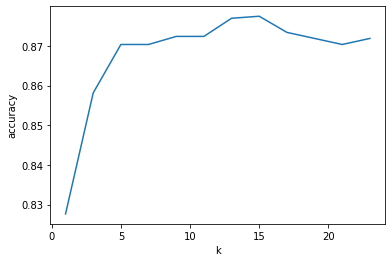

In [48]:
plt.plot(a["k"],a['accuracy'])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [49]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,25,2)}
gsearch=GridSearchCV(knn,param_grid=params,scoring='roc_auc',cv=3,n_jobs=-1)
gsearch.fit(x_trains,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])},
             scoring='roc_auc')

In [50]:
gsearch.best_params_

{'n_neighbors': 23}

<a id="nb"> </a>
## 3. Naive Bayes

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a Gaussian naive bayes model and generate a classification report. Also tell how well is the model performing.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
from sklearn.naive_bayes import GaussianNB

y=df['y']
x=df.drop('y',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=4)

gnb=GaussianNB()
gnb.fit(x_train,y_train)

y_test_pred=gnb.predict(x_test)
y_test_prob=gnb.predict_proba(x_test)[:,1]

print("Area under the roc curve is : ",roc_auc_score(y_test,y_test_prob))


Area under the roc curve is :  0.8903797182560442


In [53]:
# area under the curve is around 0.9 which is near to 1. so the model is good and performing well

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Find the area under the receiver operating characteristic curve and the confusion matrix for the Naive Bayes model built in question 18.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
print("confusion matrix : ",confusion_matrix(y_test,y_test_pred))
print("Area under the roc curve is : ",roc_auc_score(y_test,y_test_prob))


confusion matrix :  [[924 274]
 [148 621]]
Area under the roc curve is :  0.8903797182560442


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a Gaussian Naive Bayes model and perform 10 fold cross validation and find the average accuracy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gnb=GaussianNB()

score=cross_val_score(gnb,x_train,y_train,cv=10)

print("Average accuracy of the model is : ",score.mean())

Average accuracy of the model is :  0.7811722845372986
